In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#Dataset classico do Iris
from sklearn.datasets import load_iris
iris = load_iris()

In [94]:
#Transormando em Dataframe Pandas para manipulação
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [83]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Dataset Iris plotando as caracteristicas:
- Petal length
- Sepal length

<AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>

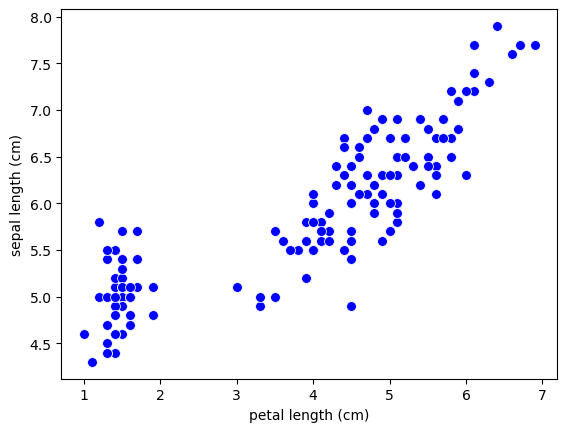

In [84]:
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', 
                data=df, s=50, color='blue')

In [95]:
#Variável contendo os valores dos atributos selecionados
X = df[['petal length (cm)', 'sepal length (cm)']].values

## Método do cotovelo

Primeiramente foi feita a escolha do número de clusters para realizar o clustering. Para isso,

- Foram treinados os modelos do K-means para diversos valores de clusters (2-7).

- Em seguida verificado o parâmetro ```inertia_``` em que consiste na soma das distancias ao quadrado para o Centroid mais próximo.

Text(0, 0.5, 'Distortion')

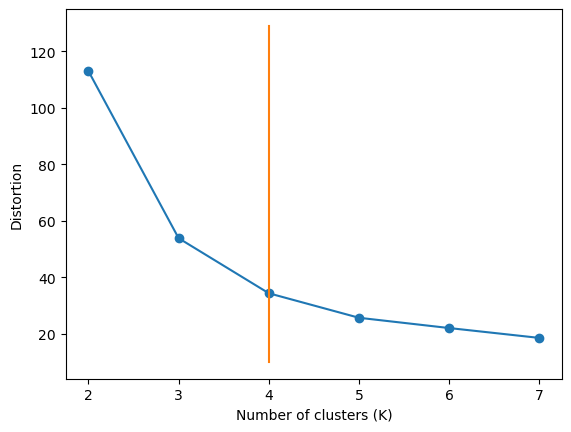

In [86]:
distortions = []

for k in range(2, 8):
    KMeans_model = KMeans(n_clusters=k, random_state=14, n_init=10)
    KMeans_model.fit(X)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 8), distortions,  marker='o')
plt.plot(np.ones(120)*4, range(10,130))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')

Os dados da distorção foram plotados no gráfico em função do número de clusters.

Foi identificado visualmente, utilizando o método do cotovelo que onde começa a ter uma diferença de distorção menor é quando o número de cluster é 4.

Dessa forma foi escolhido o valor de 4 cluster para prosseguir com a clusterização dos dados como indica a figura.

## K-Means

Anteriormente foi realizado o procedimento de treinamento dos modelos para verificar as distâncias para a decisão do K (número de clusters), porém nessa seção será explicado de forma mais detalhada.

Foi criado uma instância do modelo utilizado a função ```KMeans()``` do Sckit Learn ```sklearn.cluster``` em que é passado como parâmetros o número de clusters (```n_clusters```), o ```random_state``` para um valor fixo de aleatoriedade para dar o mesmo resultado independente do momento que a função é executada e o parâmetro ```n_init``` que é o número de vezes que o algorítimo do K-Means é rodado para diferentes valores de Centroids, onde é escolhido o melhor caso no final.

Em seguida treinado o modelo de fato com a função ```fit()```

In [96]:
model = KMeans(n_clusters=4, random_state=14, n_init=10)
model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=14)

Os 4 centroids são encontrados no atributo ```cluster_centers_``` e mostrado a posição espacial nos parâmetros do dataset de tamanho de pétalas e sépalas.

In [88]:
centroids = model.cluster_centers_
centroids

array([[6.03181818, 7.12272727],
       [1.462     , 5.006     ],
       [4.94      , 6.292     ],
       [3.96071429, 5.53214286]])

É possível visualizar as separações por clusters dos dados de acordo com a distância ao centroid mais próximo pelo atributo ```labels_```.

In [89]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2], dtype=int32)

Em seguida, com essas inforamções, foram plotados novamente os pontos do dataset, porém separados pelos Labesl separados com o K-Means de 4 Clusters, indicados pela cor dos pontos.

Também foi indicado a posição com um "X" vermelho a posição dos centroids escolhidos.

<AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>

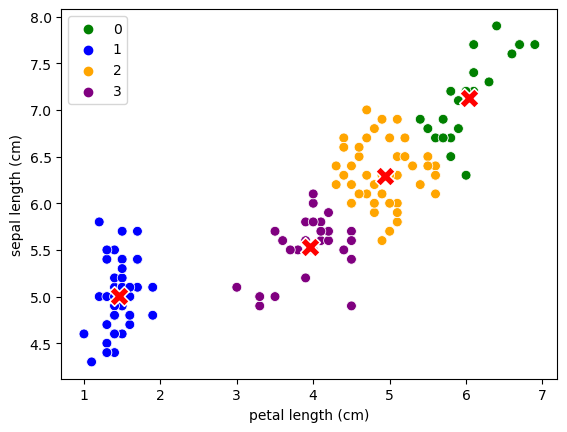

In [93]:
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', data=df,
                s=50, hue=model.labels_, palette=['green', 'blue', 'orange','purple'])

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', 
                s=200, color='red')

Devido a utilização do dataset do Iris, já conhecido, se sabe que na realidade, existem 3 espécies de flores Iris e não 4 como se deu a separação do número de clusters pelo método do cotovelo. Indicando que pode não ser o modelo mais apropriado para determinados datasets devido sua simplicidade.

A escolha do número de clusters é importante e existem diveros métodos para sua escolha.

Para comparação, será inidicado o algortímo do K-Means para o número de 3 clusters, que pelo dataset, seria a escolha correta.

<AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>

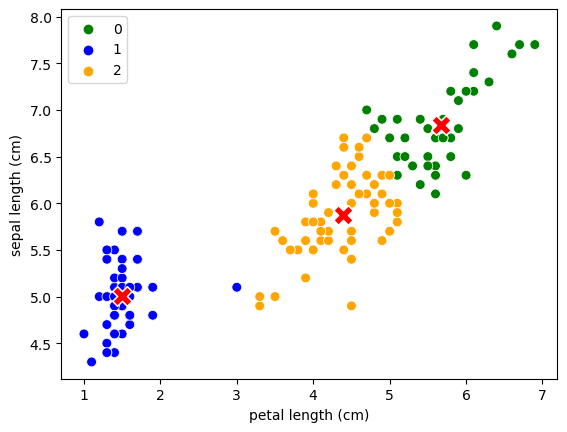

In [97]:
model = KMeans(n_clusters=3, random_state=14, n_init=10)
model.fit(X)
centroids = model.cluster_centers_
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', data=df,
                s=50, hue=model.labels_, palette=['green', 'blue', 'orange'])

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', 
                s=200, color='red')